In [32]:
import pandas as pd
prices = pd.read_csv('prices.csv')
prices.head()

,Unnamed: 0,time,low,high,open,close,volume,date
0,0,1516860900,11483.36,11508.71,11499.99,11508.70,4.335608,2018-01-25 07:15:00
1,1,1516861200,11508.70,11517.55,11508.70,11516.00,12.414949,2018-01-25 07:20:00
2,2,1516861500,11473.55,11512.21,11511.79,11473.55,10.734482,2018-01-25 07:25:00
3,3,1516861800,11473.55,11500.00,11473.56,11493.83,2.726123,2018-01-25 07:30:00
4,4,1516862100,11465.00,11493.83,11493.83,11478.80,3.685164,2018-01-25 07:35:00


In [2]:
prices.corr()

,Unnamed: 0,time,low,high,open,close,volume
Unnamed: 0,1.000000,1.000000,-0.392279,-0.393081,-0.387746,-0.391867,0.351597
time,1.000000,1.000000,-0.392279,-0.393081,-0.387746,-0.391867,0.351597
low,-0.392279,-0.392279,1.000000,0.993017,0.992325,0.995515,-0.404821
high,-0.393081,-0.393081,0.993017,1.000000,0.995094,0.994327,-0.360105
open,-0.387746,-0.387746,0.992325,0.995094,1.000000,0.987571,-0.376672
close,-0.391867,-0.391867,0.995515,0.994327,0.987571,1.000000,-0.384047
volume,0.351597,0.351597,-0.404821,-0.360105,-0.376672,-0.384047,1.000000


In [61]:
closes = prices['close']
for i in range(len(prices)):
    if i > 0:
        m = closes[:i].max()
        mini = closes[:i].min()
    

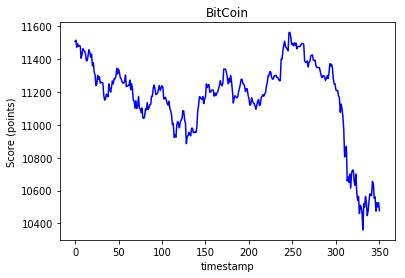

In [3]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.show()

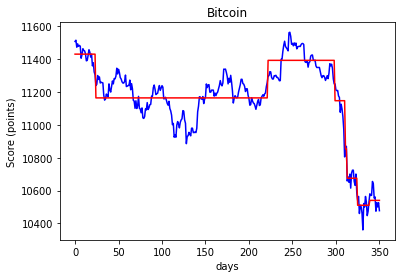

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

X = np.arange(len(prices)).reshape(-1, 1)
y = np.array(prices['close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

y_predict = tree_reg.predict(X)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['close'], 'b')
plt.plot(y_predict, 'r')
plt.show()